In [1]:
import os
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
import tensorflow as tf

/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/rishotics/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


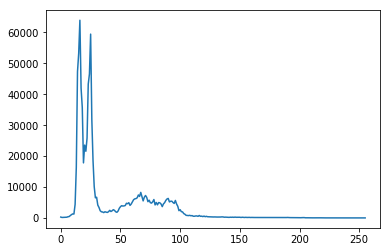

In [21]:
hist=cv.calcHist([dance_image[3]],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

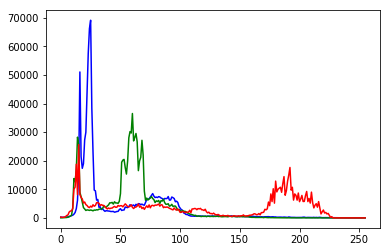

In [22]:

color=('b','g','r')

for i,col in enumerate(color):
    hist=cv.calcHist([dance_image[20]],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    
plt.show()

In [5]:
def hsgm(img):
    color=('b','r','g')
    
    for i,col in enumerate(color):
        hist=cv.calcHist([img],[i],None,[256],[0,256])
        plt.plot(hist,color=col)
    
    plt.show()

In [3]:
img=dance_image[1]
img2=img
hsgm(dance_image[1])
blur=cv.GaussianBlur(dance_image[1],(5,5),0)
blur=cv.medianBlur(dance_image[1],5)

gs=cv.cvtColor(blur,cv.COLOR_BGR2GRAY)
so=cv.Sobel(gs,ddepth=-1,dx=0,dy=1)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(so),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

edges=cv.Canny(gs,50,100,apertureSize=3)
plt.imshow(edges)
lines = cv.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv.line(img2,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(img2)
cv.imwrite('hough.jpg',dance_image[1])



NameError: name 'hsgm' is not defined

True

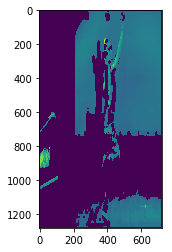

In [7]:
gs=cv.cvtColor(blur,cv.COLOR_BGR2GRAY)

edges=cv.Canny(gs,50,100,apertureSize=3)
lines = cv.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv.line(img2,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(edges)
plt.imshow(gs)
ret,th=cv.threshold(gs,80,255,cv.THRESH_TOZERO)
img, contours, hierarchy = cv.findContours(th,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
cnt=contours[0]
M=cv.moments(cnt)
c=cv.drawContours(img, contours, -1, (0,255,0), 3)
plt.imshow(c)
cv.imwrite('contors.jpg',c)

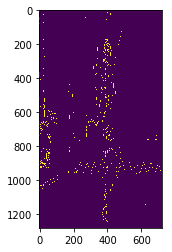

In [3]:
img=dance_image[1]
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray,(5,5),0)
ret,thresh = cv.threshold(img,120,255,cv.THRESH_TRUNC)
edges=cv.Canny(blur,50,100,apertureSize=3)
plt.imshow(edges)

FROM SKIMAGE IMPORT 



In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def nothing(x):
    pass
cv2.namedWindow('Colorbars')
hh='Max'
hl='Min'
wnd = 'Colorbars'
cv2.createTrackbar("Max", "Colorbars",0,255,nothing)
cv2.createTrackbar("Min", "Colorbars",0,255,nothing)
img = cv2.resize(gray, (0,0), fx=0.5, fy=0.5)
# titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
# images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
# for i in xrange(6):
#     plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
#     plt.title(titles[i])
#     plt.xticks([]),plt.yticks([])
# plt.show()
while(1):
    hul=cv2.getTrackbarPos("Max", "Colorbars")
    huh=cv2.getTrackbarPos("Min", "Colorbars")
    ret,thresh1 = cv2.threshold(img,hul,huh,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(img,hul,huh,cv2.THRESH_BINARY_INV)
    ret,thresh3 = cv2.threshold(img,hul,huh,cv2.THRESH_TRUNC)
    ret,thresh4 = cv2.threshold(img,hul,huh,cv2.THRESH_TOZERO)
    ret,thresh5 = cv2.threshold(img,hul,huh,cv2.THRESH_TOZERO_INV)
    # cv2.imshow(wnd)
    cv2.imshow("thresh1",thresh1)
    cv2.imshow("thresh2",thresh2)
    cv2.imshow("thresh3",thresh3)
    cv2.imshow("thresh4",thresh4)
    cv2.imshow("thresh5",thresh5)
    
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
      mode = not mode
    elif k == 27:
      break
cv2.destroyAllWindows()

In [17]:

def nothing(x):
    pass

cv.namedWindow('Colorbars')
hh='Max'
hl='Min'
wnd = 'Colorbars'
cv.createTrackbar("Max", "Colorbars",0,255,nothing)
cv.createTrackbar("Min", "Colorbars",0,255,nothing)
img = cv.resize(img, (0,0), fx=0.5, fy=0.5)
# titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
# images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
# for i in xrange(6):
#     plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
#     plt.title(titles[i])
#     plt.xticks([]),plt.yticks([])
# plt.show()

while(1):
    hul=cv.getTrackbarPos("Max", "Colorbars")
    huh=cv.getTrackbarPos("Min", "Colorbars")
    ret,thresh1 = cv.threshold(thresh1,68,255,cv.THRESH_BINARY)
    edges=cv.Canny(gray,hul,huh)
    

    # cv2.imshow(wnd)
    cv.imshow("canny",edges)
    k = cv.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv.destroyAllWindows()

error: /tmp/binarydeb/ros-kinetic-opencv3-3.3.1/modules/imgproc/src/resize.cpp:3945: error: (-215) dsize.area() > 0 in function resize


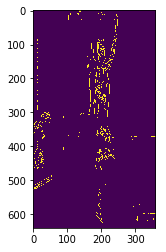

In [4]:
img = cv.resize(img, (0,0), fx=0.5, fy=0.5)
ret,thresh1 = cv.threshold(img,126,255,cv.THRESH_BINARY)
edges=cv.Canny(thresh1,0,85,apertureSize=3)
plt.imshow(edges)

In [ ]:
#watershed
# load the image and perform pyramid mean shift filtering
# to aid the thresholding step
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import numpy as np
import argparse
import cv2
import cv2
shifted = cv2.pyrMeanShiftFiltering(img, 21, 51)
cv2.imshow("Input", img)
 
# convert the mean shift image to grayscale, then apply
# Otsu's thresholding
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv2.imshow("Thresh", thresh)
# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20,
	labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
# loop over the unique labels returned by the Watershed
# algorithm
for label in np.unique(labels):
	# if the label is zero, we are examining the 'background'
	# so simply ignore it
	if label == 0:
		continue
 
	# otherwise, allocate memory for the label region and draw
	# it on the mask
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[labels == label] = 255
 
	# detect contours in the mask and grab the largest one
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)[-2]
	c = max(cnts, key=cv2.contourArea)
 
	# draw a circle enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
	cv2.putText(image, "#{}".format(label), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
 
# show the output image
cv2.imshow("Output", image)
cv2.waitKey(0)

/home/rishotics/anaconda2/lib/python2.7/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


[INFO] 56 unique segments found


In [71]:
from sklearn.mixture import GMM
from sklearn.decomposition import PCA
def BN(a):
    a=np.array(a)
    print("shape b4 BN")
    print(a.shape)
    bn=(a-a.mean(axis=0))/((a.var(axis=0)+1e-8)**0.5)
    print("BN shape =")
    print(bn.shape)
    return(bn)
def gmm_features(image):
    pca = PCA(0.99, whiten=True)
    print(image.shape)
    x,y,z=image.shape
    dance_image_flat=np.reshape(image,(x,y*z))
    
    data = pca.fit_transform(dance_image_flat)
    gmm = GMM(20, covariance_type='full', random_state=0)
    gmm.fit(data)
    print(gmm.converged_)
    return gmm.weights_


In [ ]:
X=[]

labels=[]
for dance_dir_path in glob.glob("/home/rishotics/ppd_sir/dataset/*"):
    dance_label=dance_dir_path.split("/")[-1]
    dance_feature=[]
    print("1")
    for dance_dir_path_vnum in glob.glob("/home/rishotics/ppd_sir/dataset/"+dance_label+"/*"):
        video_num=dance_dir_path_vnum.split("/")[-1]
        video_num=video_num[1:]
        
        dance_image=[]
        print("2")
        for i,dance_path_image in enumerate(glob.glob(os.path.join(dance_dir_path_vnum,"*.jpg"))):
            
            if(i<10000):
                
                print(dance_path_image)
                image=cv.imread(dance_path_image,-1)
                image = cv.resize(image, (64, 128))
                image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
                labels.append(dance_label)
                dance_image.append(image)
                
            i=1+i
            
        dance_image=np.array(dance_image)
        
        
        pca = PCA(0.99, whiten=True)
        print("Video number=")
        print(video_num)
        print("Dance label=")
        print(dance_label)
        print("SHAPE=")
        print(dance_image.shape)
        x,y,z=dance_image.shape
        dance_image_flat=np.reshape(dance_image,(x,y*z))
        data = pca.fit_transform(dance_image_flat)
        gmm = GMM(20, covariance_type='full', random_state=0)
        gmm.fit(data)
        print(gmm.converged_)
        features=gmm.weights_
        
    dance_feature.append(features)
    print("dance feature shape")
    print(dance_feature.shape)
    dance_feature_BN=BN(dance_feature)
    X.append(dance_feature_BN)
    labels.append(dance_label)
X=np.array(X)    
labels=np.array(labels)
dance_to_dict={i:k for k,i in enumerate(np.unique(labels))}
dict_to_id={i:k for k,i in dance_to_dict.items()}
label_id=np.array([dance_to_dict[x] for x in labels]) 

            
        
        

1
2
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98906.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92386.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94666.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97493.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95070.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99068.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95065.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97092.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98196.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910174.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92490.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92178.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93822.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99279.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95783.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96838.jpg
/ho

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95053.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95888.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95731.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91611.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96146.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91757.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98997.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92328.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98331.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92497.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91495.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92221.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96928.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95807.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91570.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96922.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96560.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94833.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92902.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95057.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92849.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90499.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910467.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94430.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92921.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98627.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90359.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90092.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90717.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94855.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91046.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95959.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96637.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96277.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93340.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92072.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94324.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97791.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99421.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92556.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98606.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92608.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95052.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98082.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98596.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90400.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92815.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99746.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90953.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90281.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91317.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95982.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95971.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99549.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93494.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95031.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95461.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91361.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90721.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99774.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96684.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92932.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91371.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92548.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90375.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91887.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95749.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97007.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96790.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92096.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95804.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93857.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97750.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96366.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94414.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910223.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94132.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95908.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95187.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91990.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91695.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90820.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96660.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90325.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95375.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95640.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94526.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98564.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94102.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92585.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93133.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90128.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96834.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90876.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94676.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92282.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96783.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98956.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91809.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99642.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94761.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95480.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94849.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93379.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96457.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97180.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92039.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93025.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99487.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97443.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97239.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95624.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93815.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94114.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99329.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94894.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99736.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92544.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96924.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93550.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90220.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92033.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91614.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91564.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91750.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93169.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98111.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92930.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94712.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96168.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95153.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99571.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90328.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93927.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96251.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91287.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98966.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90252.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97974.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94711.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93820.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93480.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99479.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90034.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93132.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94913.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96661.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91501.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97008.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94052.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93114.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99893.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96864.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96252.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98197.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97621.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92748.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91331.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91516.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92942.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94870.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92414.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910230.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99707.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90425.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98244.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93772.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93095.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910298.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93282.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91849.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92945.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96944.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91387.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95368.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92092.jpg
/home/

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97640.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97980.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91328.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90919.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99658.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97760.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99862.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98465.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92160.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95716.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91871.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99216.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99717.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95096.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91873.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91805.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910349.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94234.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90696.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910073.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92574.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99582.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90574.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96655.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97654.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93393.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99865.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95790.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93802.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97971.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97459.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90071.jpg
/home/

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90720.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94381.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95517.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91427.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98450.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90083.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910105.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92097.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95518.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94786.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92368.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98881.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90099.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96759.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98721.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98333.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96829.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92936.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95349.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92565.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910169.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99516.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93010.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90091.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94988.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99163.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94627.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910160.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91335.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93324.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93166.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99319.jpg
/home/

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90724.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95855.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98083.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99198.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98001.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91150.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910335.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91803.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93196.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94915.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93490.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91211.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96199.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98540.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95124.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95445.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97418.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98347.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99285.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93516.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94567.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99461.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92444.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90979.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96243.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93100.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94884.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95962.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97992.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96392.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98409.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99576.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91037.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99901.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92046.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96405.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91624.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92292.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93854.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98950.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910137.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94924.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92376.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92957.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92796.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91333.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94910.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92170.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97006.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99297.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93844.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93675.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97609.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93289.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90063.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96045.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93233.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92513.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96270.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91569.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97854.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94403.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94914.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90009.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92550.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93241.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96260.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92164.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99035.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91295.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94590.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90336.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98451.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99926.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90599.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97679.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90620.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90351.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97310.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94717.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90202.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99136.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95141.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97952.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99370.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90718.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98767.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95404.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91630.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96418.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99798.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93090.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92778.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99327.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94140.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95723.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96884.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99567.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97223.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99848.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96505.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94886.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94765.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93175.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94120.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96298.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910286.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90690.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92481.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91817.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92450.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97102.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96979.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910375.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99547.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98074.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92564.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98751.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90886.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96866.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97112.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91278.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90861.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95702.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99580.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90005.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95061.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94188.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98967.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94028.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94464.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93946.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93389.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91406.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98827.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94235.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99476.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91440.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98023.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95089.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93631.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95040.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97656.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93493.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93919.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94521.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95408.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90048.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97325.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94795.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92472.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95293.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98709.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95078.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92015.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910422.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94459.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95123.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96276.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97692.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95468.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98455.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91810.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93540.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96126.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97094.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91038.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97559.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90878.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96341.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97724.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94439.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96630.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91357.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91752.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97294.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94770.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99528.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910199.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91834.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99765.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94888.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91612.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95545.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98705.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90773.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90249.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92218.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91486.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99477.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99788.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94004.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91063.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91285.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98929.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90003.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91831.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95994.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98470.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96371.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93620.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93424.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96977.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98480.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97271.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910351.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92797.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99413.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98259.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93180.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93308.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93932.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97790.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95481.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97695.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98090.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910304.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95298.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93244.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95259.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92224.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97544.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97157.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92929.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92989.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94962.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92314.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96964.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95475.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93628.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910455.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92736.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95264.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93997.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95157.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95706.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910465.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98113.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92975.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98917.jpg
/home/

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90250.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96638.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99586.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94939.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99474.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99910.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94065.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97146.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95161.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95066.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98637.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94501.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98354.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99796.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91460.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93191.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92831.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98289.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92158.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92132.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90785.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94247.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99118.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95796.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93346.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96568.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92695.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91604.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910136.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99947.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90125.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96587.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98766.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97744.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96614.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92823.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94068.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98938.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91166.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92409.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91880.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94428.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99326.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90285.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96456.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93455.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95449.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94230.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91076.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98713.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99336.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99155.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90123.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910195.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95628.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90881.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90156.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93228.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90404.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94648.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98233.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93910.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97824.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90441.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98186.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92699.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98369.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92070.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98513.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93574.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97840.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96712.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94318.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90819.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90790.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93616.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91033.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99181.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95321.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98381.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96353.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99866.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96040.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92169.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97671.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98154.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96999.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99330.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97959.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95181.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96785.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90543.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97877.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91007.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93164.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910104.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90996.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93005.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97421.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97125.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99743.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98024.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91930.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96281.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93548.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90942.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92507.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93884.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93464.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92390.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95666.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93115.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98981.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93328.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97027.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97927.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91670.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94528.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92391.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94589.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92477.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96332.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94869.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90926.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96591.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92319.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96549.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94317.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93388.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96193.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93888.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93155.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98916.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98914.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95945.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96074.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98288.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91651.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93901.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99375.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98922.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91356.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90472.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90108.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93740.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93094.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96491.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95402.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95726.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98356.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93951.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93870.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93501.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98989.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95215.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90918.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97427.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91079.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92575.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92721.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96195.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92514.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90786.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97452.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96230.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910292.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90329.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93892.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99729.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92959.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95421.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95952.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91117.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91000.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98433.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99648.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97210.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99590.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95619.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97084.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93779.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91511.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95223.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96869.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95032.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91099.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90554.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910441.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96926.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90474.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97550.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95785.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99110.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99739.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90750.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97805.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98115.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96156.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99944.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93764.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94587.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98048.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95787.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910269.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91588.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91464.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94824.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94252.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91621.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96845.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910128.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91665.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94933.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99756.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91657.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97086.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98052.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910333.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99994.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92071.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94181.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92338.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93537.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92570.jpg
/home/

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99171.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95562.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98184.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96338.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92592.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96544.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93305.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97374.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93158.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94729.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98970.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94323.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91245.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90203.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93162.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92190.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91075.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96542.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92112.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90582.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91861.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99253.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97955.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98368.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95561.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90715.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93796.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94690.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91850.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91994.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910186.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94693.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93112.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95912.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94375.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92501.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93811.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91399.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91697.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91056.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95613.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95485.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98016.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92363.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95060.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97819.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97619.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94817.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96657.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92108.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97634.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95044.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91155.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97381.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95814.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91938.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98976.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93009.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98670.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96962.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910421.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95943.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91918.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910036.jpg
/home/

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92077.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90764.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91494.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99263.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93923.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94714.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90951.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99924.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95108.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96987.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93592.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910119.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91701.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95759.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90726.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93227.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93151.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97145.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98021.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91722.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97480.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96990.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99067.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95902.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90882.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93797.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94483.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93177.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98823.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95101.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97906.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98479.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91813.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90908.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910090.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94095.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91454.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91517.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96550.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99348.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99351.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90692.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97215.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96120.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93142.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95129.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91165.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91325.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93407.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92351.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99462.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94404.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97716.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97265.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96237.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99601.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98520.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91602.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90562.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93028.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95478.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99630.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91702.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91209.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98921.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95993.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94925.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98326.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91254.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91100.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95659.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97329.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99130.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92327.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95444.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96068.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92688.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97845.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95602.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91928.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90541.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97280.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93387.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91538.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94691.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98909.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90074.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90837.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90575.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98282.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99006.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92111.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97060.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94155.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910140.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90299.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95512.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96254.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94177.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90664.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94116.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92715.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94353.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96821.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95824.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96013.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99201.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96135.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91190.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91776.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93154.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93988.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97949.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92265.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96434.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97127.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92291.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91474.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93226.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90569.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91085.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92050.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98073.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92248.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94389.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92432.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90305.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96016.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97666.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93318.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90961.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92915.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99699.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93134.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96986.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97788.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99693.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97578.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96558.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94909.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95370.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92634.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92606.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96273.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98441.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94763.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94946.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98177.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91963.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93051.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90157.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94543.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92596.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96376.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94200.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97096.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93897.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96617.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90292.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94058.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98262.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94231.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98985.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92659.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91682.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90228.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90330.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99223.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95948.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97755.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90026.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91203.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94664.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92853.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93596.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98313.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92934.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92777.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95976.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93469.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90625.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94614.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98330.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93467.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91445.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96248.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95930.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92788.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94193.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96478.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910245.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90006.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910297.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93462.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99423.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94296.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90457.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90317.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98469.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96280.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96096.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94217.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99907.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96673.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90254.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90376.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91899.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97769.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99852.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97048.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90350.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94981.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90137.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97019.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93998.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96008.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97830.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97218.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94497.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94506.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99568.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91479.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94724.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98591.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91625.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92636.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97453.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98223.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98112.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91896.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90967.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91349.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93858.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98355.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92679.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97247.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97853.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90576.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93778.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94862.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93322.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98494.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93889.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96426.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96709.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90808.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98138.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95524.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92835.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99317.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94700.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95242.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910141.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93250.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98432.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98162.jpg
/home/r

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91436.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98759.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96717.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98323.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91733.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94864.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90639.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92027.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92341.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93634.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96245.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96764.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97574.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96082.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95104.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90938.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96700.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92261.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93785.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96762.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90609.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90320.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91911.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94429.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97331.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94805.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92822.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95951.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91576.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92270.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91955.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92428.jpg
/home/ri

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95346.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90537.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94918.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97465.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97275.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98895.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90314.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93686.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92034.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95900.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94468.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95154.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910060.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910314.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV94126.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98334.jpg
/home/

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96178.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91780.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99589.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91330.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93117.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99004.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97228.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910289.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99741.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93934.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98131.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96305.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96433.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91827.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV910187.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98387.jpg
/home/

/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98995.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97868.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91415.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98702.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95742.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV99483.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV90539.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV95553.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91289.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV97604.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98604.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV98327.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV96889.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV91224.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV93255.jpg
/home/rishotics/ppd_sir/dataset/mohiniyattam/v9/mhyV92810.jpg
/home/ri

In [73]:
X.shape

(7, 1, 20)

(585, 128, 64)


(585, 394)

In [ ]:
from sklearn.mixture import GMM

n_components = np.arange(50, 510, 10)
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);


/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is de

/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/rishotics/anaconda2/lib/python2.7/

/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/depre

/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/rishotics/anaconda2/lib/python2.7/

/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/depre

/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/rishotics/anaconda2/lib/python2.7/

In [9]:
data_new = gmm.sample(100, random_state=0)
data_new.shape


(100, 394)

array([0.57435897, 0.0017094 , 0.0017094 , 0.0017094 , 0.02905983,
       0.0034188 , 0.0017094 , 0.0017094 , 0.0017094 , 0.0017094 ,
       0.33162393, 0.0017094 , 0.0017094 , 0.0017094 , 0.0017094 ,
       0.0017094 , 0.03418803, 0.0017094 , 0.0034188 , 0.0017094 ])

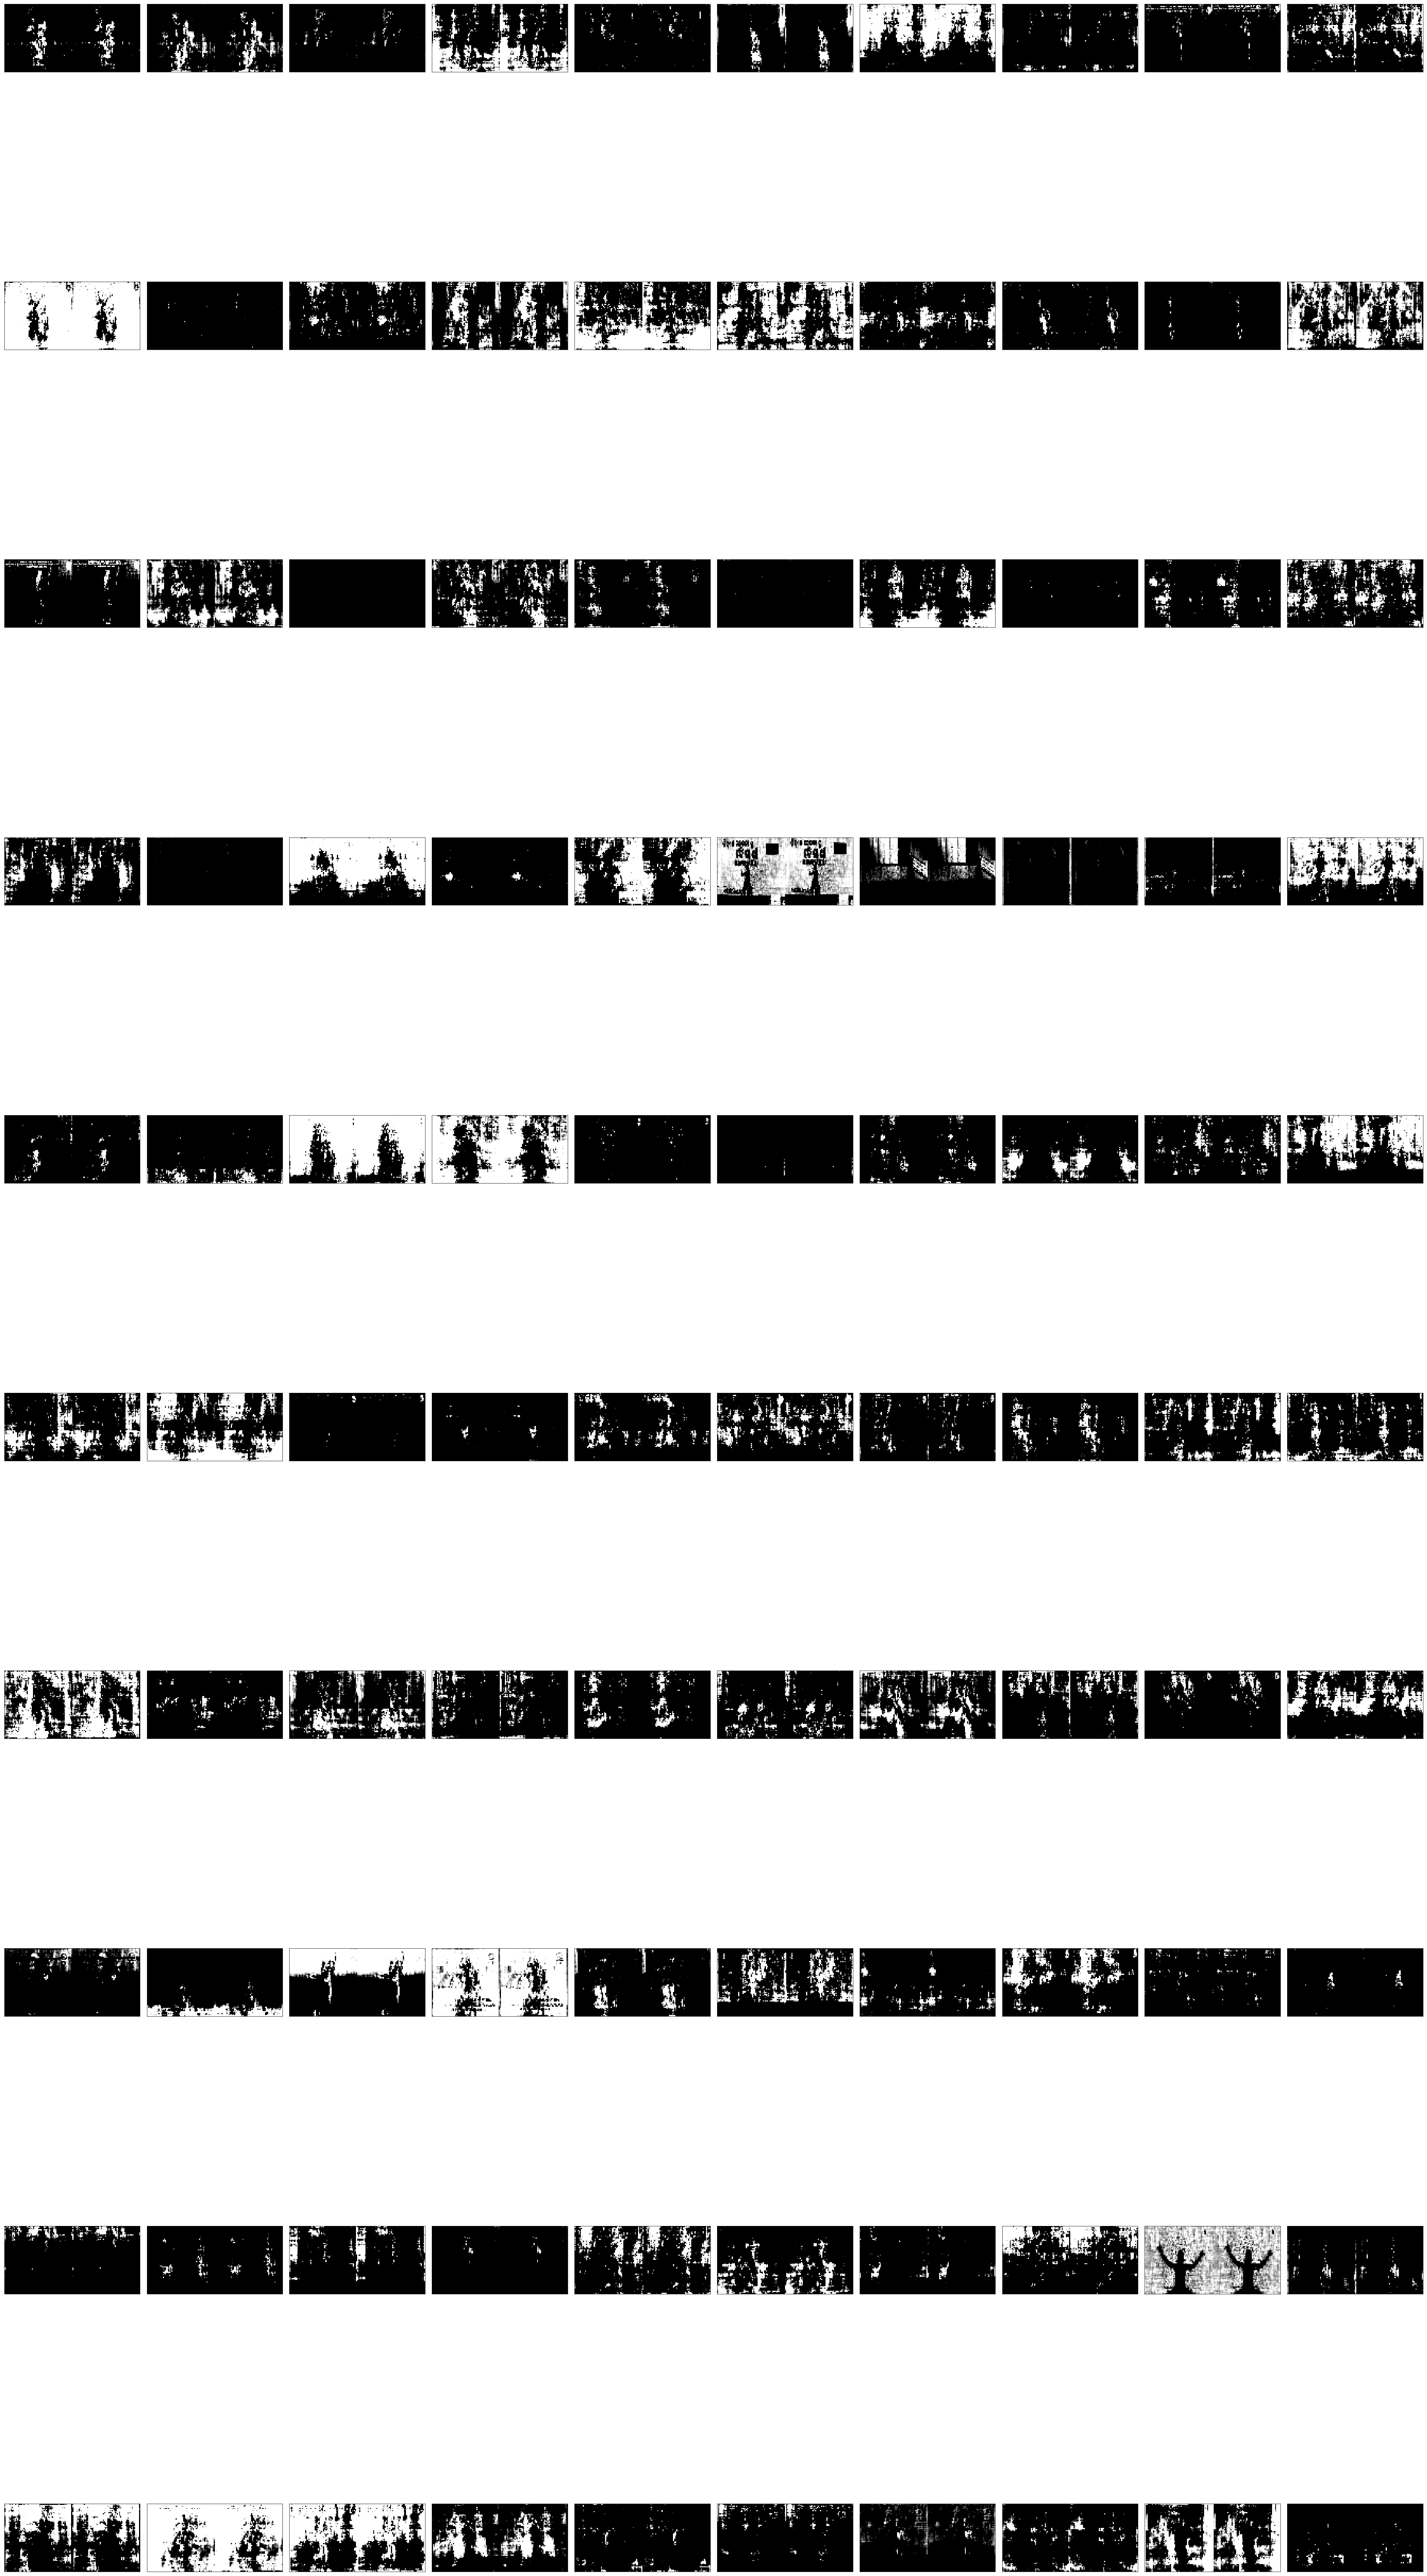

In [17]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(64, 128),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(64, 128), cmap='binary')
        im.set_clim(0, 16)

digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)
gmm.weights_

In [40]:

a=np.ones((30,64,128))
x,y,z=a.shape
a_flat=np.reshape(a,(x,y*z))
a_flat.shape
z


128